# Семинар 13

# Методы спуска (Descent methods)
# Пять способов получить градиентный спуск

## На прошлом семинаре...
1. Введение в численные методы оптимизации
2. Общая схема работы метода
3. Как сравнивать методы оптимизации?
4. Зоопарк задач и методов
5. Одномерная минимизация

## Что такое методы спуска?

Последовательность $x_k$ генерируется по правилу
$$
x_{k+1} = x_k + \alpha_k h_k
$$
так что
$$
f(x_{k+1}) < f(x_k)
$$
Направление $h_k$ называется *направлением убывания*.

**Замечание**: существуют методы, которые не требуют монотонного убывания функции от итерации к итерации.

```python
def DescentMethod(f, x0, epsilon, **kwargs):
    x = x0
    while StopCriterion(x, f, **kwargs) > epsilon:
        h = ComputeDescentDirection(x, f, **kwargs)
        alpha = SelectStepSize(x, h, f, **kwargs)
        x = x + alpha * h
    return x

```

## Способ 1: направление убывания
Рассмотрим линейную аппроксимацию дифференцируемой функции $f$ вдоль некоторого направления убывания $h, \|h\|_2 = 1$:
$$
f(x + \alpha h) = f(x) + \alpha \langle f'(x), h \rangle + o(\alpha)
$$
Из условия убывания
$$
f(x) + \alpha \langle f'(x), h \rangle + o(\alpha) < f(x)
$$
и переходя к пределу при $\alpha \rightarrow 0$:
$$
\langle f'(x), h \rangle \leq 0
$$
Также из неравенства Коши-Буняковского-Шварца
$$
\langle f'(x), h \rangle \geq -\| f'(x) \|_2 \| h \|_2 = -\| f'(x) \|_2
$$

Таким образом, направление антиградиента 
$$
h = -\dfrac{f'(x)}{\|f'(x)\|_2}
$$
даёт направление **наискорейшего локального** убывания функции$~f$.

В итоге метод имеет вид
$$
x_{k+1} = x_k - \alpha f'(x_k)
$$

## Способ 2: схема Эйлера решения ОДУ

Рассмотрим обыкновенное диференциальное уравнение вида:
$$
\frac{dx}{dt} = -f'(x(t))
$$
и дискретизуем его на равномерной сетке с шагом $\alpha$:
$$
\frac{x_{k+1} - x_k}{\alpha} = -f'(x_k),
$$
где $x_k \equiv x(t_k)$ и $\alpha = t_{k+1} - t_k$ - шаг сетки.

Отсюда получаем выражение для $x_{k+1}$
$$
x_{k+1} = x_k - \alpha f'(x_k),
$$
которое в точности совпадает с выражением для градиентного спуска.

Такая схема называется явной или прямой схемой Эйлера.

**Вопрос:** какая схема называется неявной или обратной?

## Способ 3: манипуляции с необходимым условием

\begin{align*}
& f'(x) = 0\\
& -\alpha f'(x) = 0\\
& x - \alpha f'(x) = x\\
& x_k - \alpha f'(x_k) = x_{k+1}
\end{align*}
Это **HE** доказательство корректности, только формальное получение выражения!

## Способ 4: минимизация квадратичной оценки сверху 
#### (А. В. Гасников Метод универсального градиентного спуска https://arxiv.org/abs/1711.00394)

Глобальная оценка сверху на функцию $f$ в точке $x_k$:
$$
f(y) \leq f(x_k) + \langle f'(x_k), y - x_k \rangle + \frac{L}{2} \|y - x_k \|_2^2 = g(y), 
$$
где $\lambda_{\max}(f''(x)) \leq L$ для всех допустимых $x$.

Справа &mdash; квадратичная форма, точка минимума которой имеет аналитическое выражение:
\begin{align*}
& g'(y^*) = 0 \\
& f'(x_k) + L (y^* - x_k) = 0 \\
& y^* = x_k - \frac{1}{L}f'(x_k) = x_{k+1}
\end{align*}
Этот способ позволяет оценить значение шага как $\frac{1}{L}$. Однако часто константа $L$ неизвестна.

## Способ 5: концепция доверительных областей

Минимизация линейной аппроксимации в шаре радиуса $r$ с центром в точке $x_k$
\begin{align}
& \min \; f(x_k) + \langle f'(x_k), x - x_k \rangle\\
\text{s.t. } & \| x - x_k \|^2_2 \leq r^2
\end{align}

Используя метод множителей Лагранжа и условия ККТ, получим
$$
x_{k+1} = x_k - \frac{1}{2\lambda} f'(x_k),
$$
где $\lambda$ &mdash; множитель Лагранжа, и
$$
\lambda = \frac{\| f'(x_k)\|_2}{2r}
$$

**Вопрос:** как выбрать $r$?

**Вопрос:** какое соотношение между константой Липшица $L$ градиента $f'(x_k)$ из способа 4 и $\lambda$?

## Итого: метод градиентного спуска &mdash; дёшево и сердито
```python
def GradientDescentMethod(f, x0, epsilon, **kwargs):
    x = x0
    while StopCriterion(x, f, **kwargs) > epsilon:
        h = ComputeGradient(x, f, **kwargs)
        alpha = SelectStepSize(x, h, f, **kwargs)
        x = x - alpha * h
    return x

```

## Как выбрать шаг $\alpha_k$? (J. Nocedal, S. Wright Numerical Optimization, $\S$ 3.1.)

Список подходов:
- Постоянный шаг 
$$
\alpha_k = \overline{\alpha}
$$
- Априорно заданная последовательность, например
$$
\alpha_k = \dfrac{\overline{\alpha}}{\sqrt{k+1}}
$$
- Наискорейший спуск
$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$
- Требование **достаточного** убывания, требование **существенного** убывания и условие кривизны: для некоторых $\beta_1, \beta_2$, таких что $0 < \beta_1 < \beta_2 < 1$ найти $x_{k+1}$ такую что

    - Достаточное убывание: $f(x_{k+1}) \leq f(x_k) - \beta_1 \alpha_k \langle f'(x_k), h_k \rangle$ или
    $ f(x_k) - f(x_{k+1}) \geq \beta_1 \alpha_k \langle f'(x_k), h_k \rangle
    $
    - Существенное убывание: $f(x_{k+1}) \geq f(x_k) - \beta_2 \alpha_k \langle f'(x_k), h_k \rangle$ или
    $
    f(x_k) - f(x_{k+1}) \leq \beta_2 \alpha_k \langle f'(x_k), h_k \rangle
    $
    - Условие кривизны: $\langle f'(x_{k+1}), h_k \rangle \geq \beta_2 \langle f'(x_k), h_k \rangle$

Обычно коэффициенты выбирают так: $\beta_1 \in (0, 0.3)$, а $\beta_2 \in (0.9, 1)$

### Анализ и мотивация подходов к выбору шага $\alpha_k$
- Постоянный шаг: самое простое и неэффективное решение
- Априорно заданная последовательность: немногим лучше постоянного шага
- Наискорейший спуск: самое лучшее решение, но применимо только если вспомогательная задача решается аналитически или ооооооочень быстро. <br></br>
То есть почти всегда неприменимо :)
- Требование достаточного убывания, требование существенного убывания и условие кривизны:
    - требование достаточного убывания гарантирует, что функция в точке $x_{k+1}$ не превосходит линейной аппроксимации с коэффициентом наклона $\beta_1$
    - требование существенного убывания гарантирует, что функция в точке $x_{k+1}$ убывает не меньше, чем линейная аппроксимация c коэффициентом наклона $\beta_2$
    - условие кривизны гарантирует, что угол наклона касательной в точке $x_{k+1}$ не меньше, чем угол наклона касательной в точке $x_k$, <br></br>
умноженный на $\beta_2$ 

Требование существенного убывания и условие кривизны обеспечивают убывание функции по выбранному направлению $h_k$. Обычно выбирают одно из них.
[comment]: <> (<img src="Goldstein.png", style="width: 600px;">)

#### Альтернативные названия
- Требование достаточного убывания $\equiv$ правило Армихо
- Требование достаточного убывания + условие кривизны $\equiv$ правило Вольфа
- Требование достаточного убывания + требование существенного убывания $\equiv$ правило Гольдштейна

## Зачем нужно условие существенного убывания?

<IPython.core.display.Javascript object>


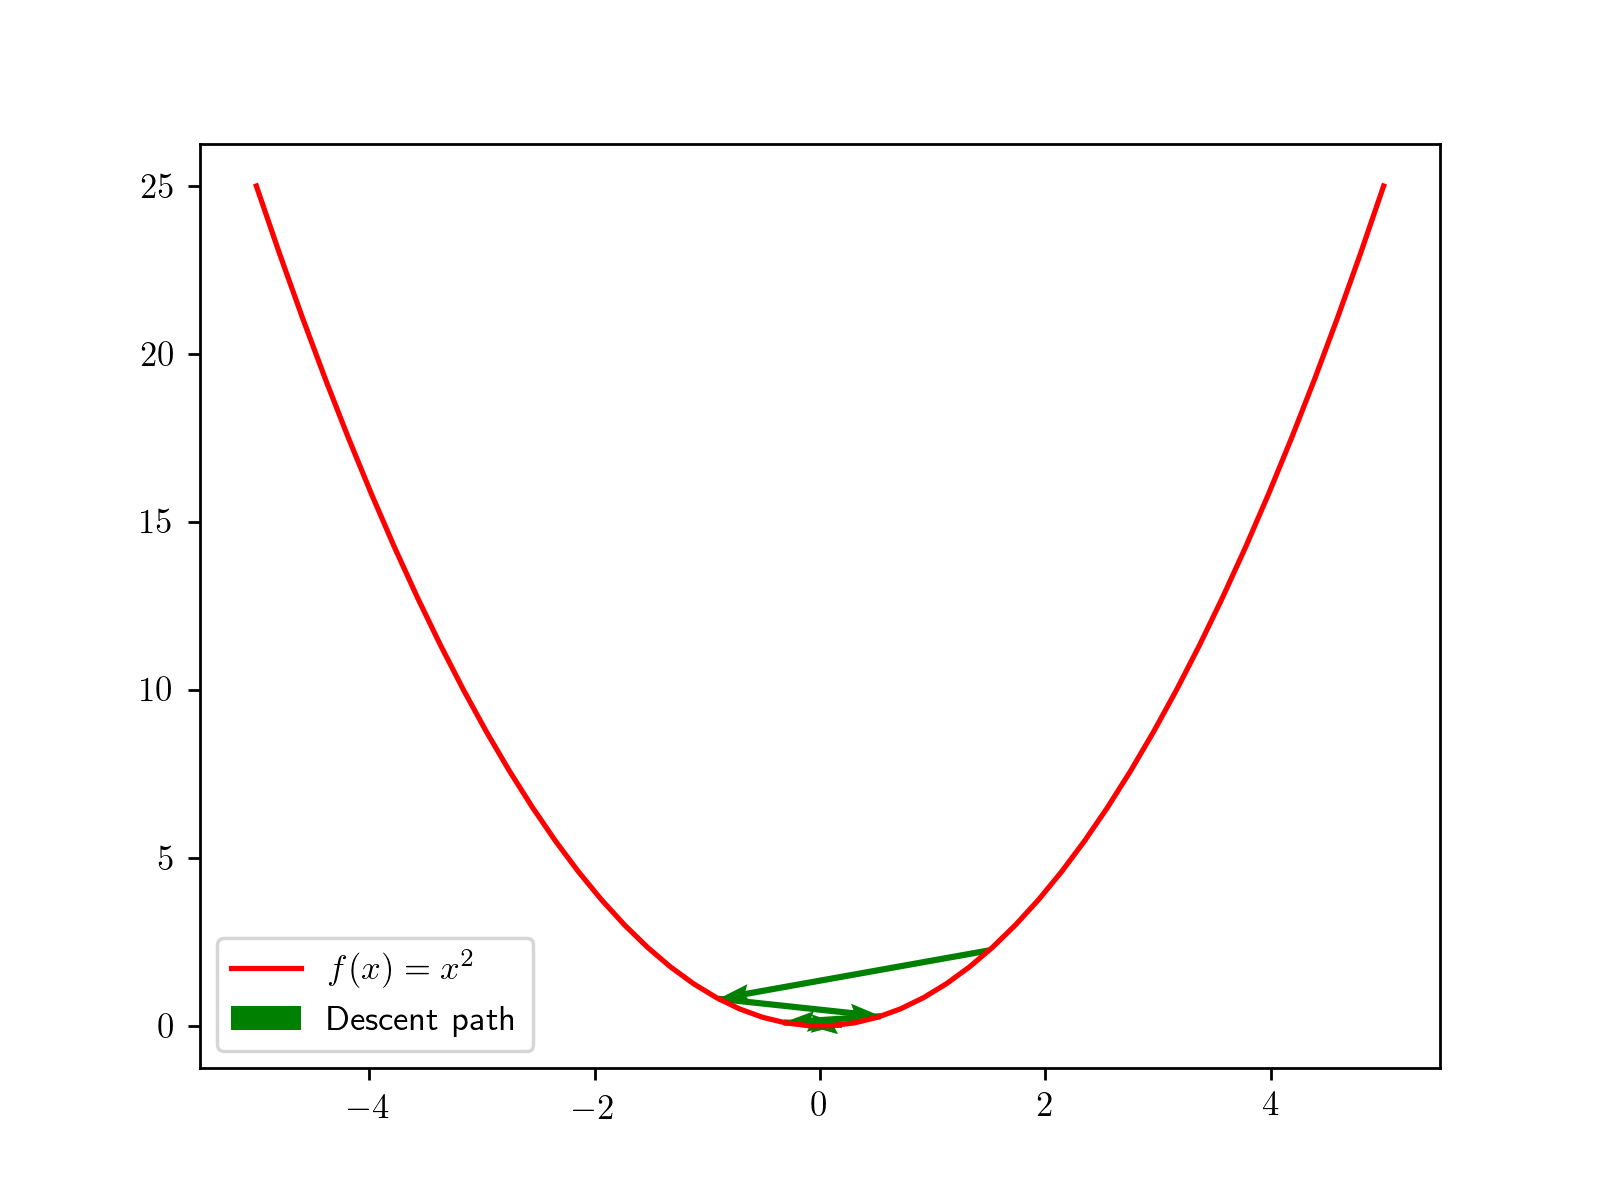

interactive(children=(FloatSlider(value=1.5, description='Initial point', max=4.0, min=-4.0), FloatSlider(value=0.8, description='Step', max=1.2), Output()), _dom_classes=('widget-interact',))

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as ipywidg
import numpy as np
import sys
sys.path.append("..")
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss

f = lambda x: np.power(x, 2)
gradf = lambda x: 2 * x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.rc("text", usetex=True)


def update(x0, step):
    gd = methods.GradientDescent(f, gradf, ss.ConstantStepSize(step))
    _ = gd.solve(np.array([x0]), max_iter=10)
    x_hist = gd.get_convergence()
    x = np.linspace(-5, 5)
    ax.clear()
    ax.plot(x, f(x), color="r", label="$f(x) = x^2$")
    y_hist = np.array([f(x) for x in x_hist])
    x_hist = np.array(x_hist)
    plt.quiver(x_hist[:-1], y_hist[:-1], x_hist[1:]-x_hist[:-1], y_hist[1:]-y_hist[:-1], 
               scale_units='xy', angles='xy', scale=1, width=0.005, color="green", label="Descent path")
    ax.legend()
    fig.canvas.draw()

step_slider = ipywidg.FloatSlider(value=0.8, min=0, max=1.2, step=0.1, description="Step")
x0_slider = ipywidg.FloatSlider(value=1.5, min=-4, max=4, step=0.1, description="Initial point")
_ = ipywidg.interact(update, x0=x0_slider, step=step_slider)

In [2]:
def plot_alpha(f, x, h, alphas):
    df = np.zeros_like(alphas)
    for i, alpha in enumerate(alphas):
        df[i] = f(x + alpha * h)
    plt.plot(alphas, df)
    plt.xlabel(r"$\alpha$", fontsize=18)
    plt.ylabel(r"$f(x + \alpha h)$", fontsize=18)

<IPython.core.display.Javascript object>


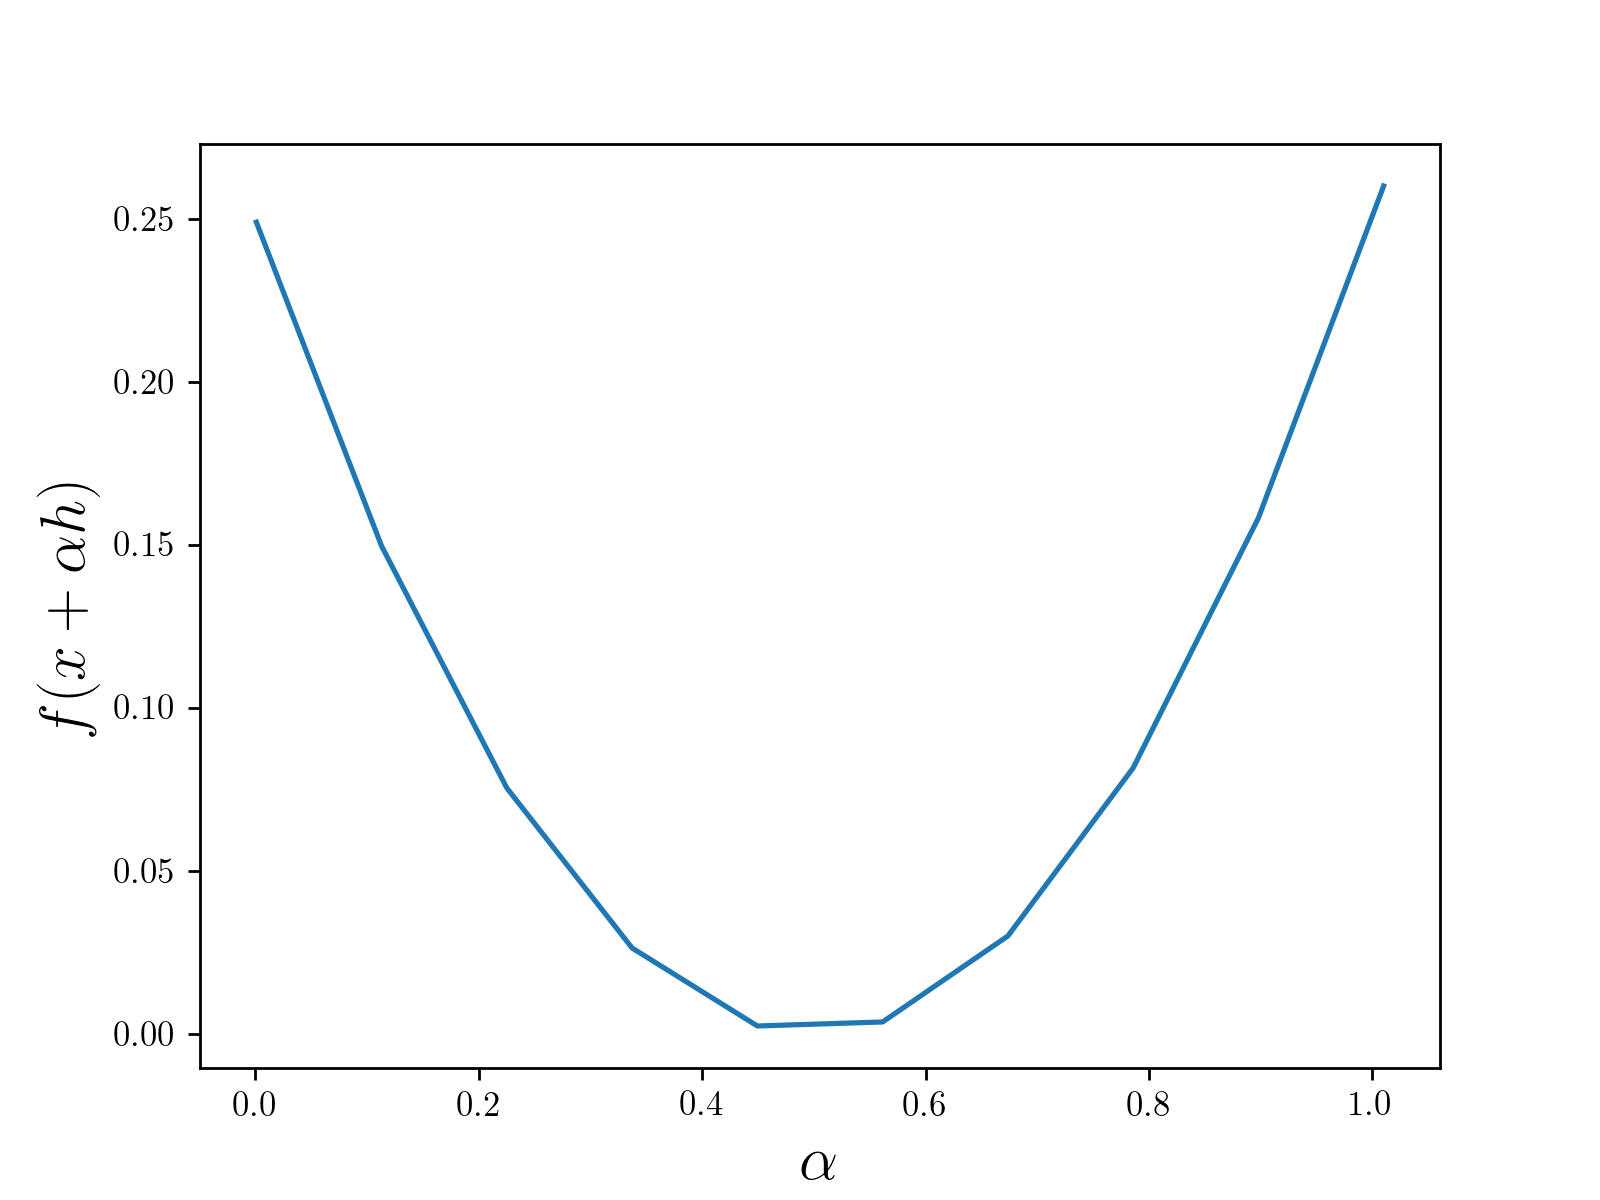

In [3]:
plot_alpha(lambda x: x**2, 0.5, -1, np.linspace(1e-3, 1.01, 10))

### Backtracking 

```python
def SelectStepSize(x, f, h, rho, alpha0, beta1, beta2):
    # 0 < rho < 1
    # alpha0 - initial guess of step size
    # beta1 and beta2 - constants from conditions
    alpha = alpha0
    # Check violating sufficient decrease and curvature conditions 
    while (f(x - alpha * h) >= f(x) + beta1 * alpha grad_f(x_k).dot(h)) and 
          (grad_f(x - alpha * h).dot(h) <= beta2 * grad_f(x_k).dot(h)):
        alpha *= rho
    return alpha
```

## Теоремы сходимости (Б.Т. Поляк Введение в оптимизацию, гл. 1, $\S$ 4;  гл. 3, $\S$ 1; Ю.Е. Нестеров Введение в выпуклую оптимизацию, $\S$ 2.2)
От общего к частному:

**Теорема 1.** 
Пусть 

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ ограничена снизу
- $\alpha = const$ и $0 < \alpha < \frac{2}{L}$

Тогда для градиентного метода выполнено:
$$
\lim\limits_{k \to \infty} f'(x_k) = 0,
$$
а функция монотонно убывает $f(x_{k+1}) < f(x_k)$.

** Теорема 2.**
Пусть
- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ непрерывен
- множество $\{ x: f(x) \leq f(x_0) \}$ ограничено
- $\alpha_k = \arg\min\limits_{\alpha \geq 0} f(x_k - \alpha f'(x_k))$

Тогда 
$$
f'(x_k) \to 0, \; k \to \infty \qquad x_{k_i} \to x^*
$$


**Теорема 3.** Пусть
- $f(x)$ дифференцируема на $\mathbb{R}^n$
- $f(x)$ выпукла 
- $f'(x)$ удовлетворяет условию Липшица с константой $L$
- $\alpha = \dfrac{1}{L}$

Тогда 
$$
f(x_k) - f^* \leq \dfrac{2L \| x_0 - x^*\|^2_2}{k+4}
$$


**Теорема 4.** 
Пусть

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ является сильно выпуклой с константой $l$
- $\alpha = const$ и $0 < \alpha < \frac{2}{L}$

Тогда градиентный метод сходится к единственной точке глобального минимума $x^*$ с линейной скоростью:
$$
\| x_k - x^* \|_2 \leq cq^k, \qquad 0 \leq q < 1
$$

**Теорема 5.**
Пусть

- $f(x)$ дифференцируема на $\mathbb{R}^n$, 
- градиент $f(x)$ удовлетворяет условию Липшица с константой $L$
- $f(x)$ является сильно выпуклой с константой $l$
- $\alpha = \dfrac{2}{l + L}$

Тогда для градиентного метода выполнено:
$$
\| x_k - x^* \|^2_2 \leq \left( \dfrac{M - 1}{M + 1} \right)^k \|x_0 - x^*\|^2_2 \qquad f(x_k) - f^* \leq \dfrac{L}{2} \left( \dfrac{M - 1}{M + 1} \right)^{2k} \| x_0 - x^*\|^2_2,
$$
где $M = \frac{L}{l}$

**Теорема 6.**
Пусть 
- $f(x)$ дважды дифференцируема и $l\mathbf{I} \preceq f''(x) \preceq L\mathbf{I}$ для всех $x$
- $\alpha = const$ и $0 < \alpha < \frac{2}{L}$

Тогда 
$$
\| x_k - x^*\|_2 \leq \|x_0 - x^*\|_2 q^k, \qquad q = \max(|1 - \alpha l|, |1 - \alpha L|) < 1
$$
и минимальное $q^* = \dfrac{L - l}{L + l}$ при $\alpha^* = \dfrac{2}{L + l}$

### От чего зависит $q^*$ и как это использовать?
Из Теорем 5 и 6 имеем 
$$
q^* = \dfrac{L - l}{L + l} = \dfrac{L/l - 1}{L/l + 1} = \dfrac{M - 1}{M + 1},
$$
где $M$ - оценка числа обусловленности $f''(x)$.

**Вопрос**: что такое число обусловленности матрицы?

- При $M \gg 1$, $q^* \to 1 \Rightarrow$ оооочень **медленная** сходимости градиентного метода. Например при $M = 100$: $q^* \approx 0.98 $
- При $M \simeq 1$, $q^* \to 0 \Rightarrow$ **ускорение** сходимости градиентного метода. Например при $M = 4$: $q^* = 0.6 $

**Вопрос**: какая геометрия у этого требования?

**Мораль**: необходимо сделать оценку $M$ как можно ближе к 1!

О том, как это сделать, Вам будет предложено подумать в домашнем задании :)

## Выбор начального приближения

Обратите внимание, что ни в одной из теорем приведённых выше не было условий на начальное приближение $x_0$!

- Для невыпуклой функции градиентный спуск сойдётся к некоторой стационарной точке, которая может быть как локальным минимумом, так и седловой точкой 
- Для выпуклых функций стационарная точка будет точкой минимума
- Способы выбора начального приближения:
    - случайная точка
    - безградиентные методы случайного поиска, например [эволюционный алгоритм](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.differential_evolution.html), алгоритм муравьиной колонии (ant colony) и т.д.
    - обычно эти методы могут дать лишь незначительное уменьшение функции, однако сильно отойти от локальных минимумов

## Вычислительный аспект и эксперименты
1. Для каждого шага метода нужно хранить только текущую точку и вектор градиента: $O(n)$ памяти
2. Поиск $\alpha_k$:
    - дан априори
    - ищется из аналитического решения задачи наискорейшего спуска
    - заканчивается за конечное число шагов
3. Для каждого шага метода нужно вычислять линейную комбинацию векторов: $O(n)$ вычислений + высокопроизводительные реализации

### Pеализация градиентного спуска

In [4]:
def GradientDescent(f, gradf, x0, epsilon, num_iter, line_search, 
                    disp=False, callback=None, **kwargs):
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        gradient = gradf(x)
        alpha = line_search(x, -gradient, **opt_arg)
        x = x - alpha * gradient
        if callback is not None:
            callback(x)
        iteration += 1
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x))}
    return res

### Выбор шага

Реализации различных способов выбора шага приведены [тут](https://github.com/amkatrutsa/liboptpy/blob/master/step_size.py)

### Зависимость от обусловленности матрицы $f''(x)$
Рассмотрим задачу 
$$
\min f(x),
$$ 
где
$$
f(x) = x^{\top}Ax, \; A = 
\begin{bmatrix}
1 & 0\\
0 & \gamma
\end{bmatrix}
$$

$$
f'(x) = 2Ax
$$

In [4]:
def my_f(x, A):
    return 0.5 * x.dot(A.dot(x))

def my_gradf(x, A):
    return A.dot(x)

<IPython.core.display.Javascript object>


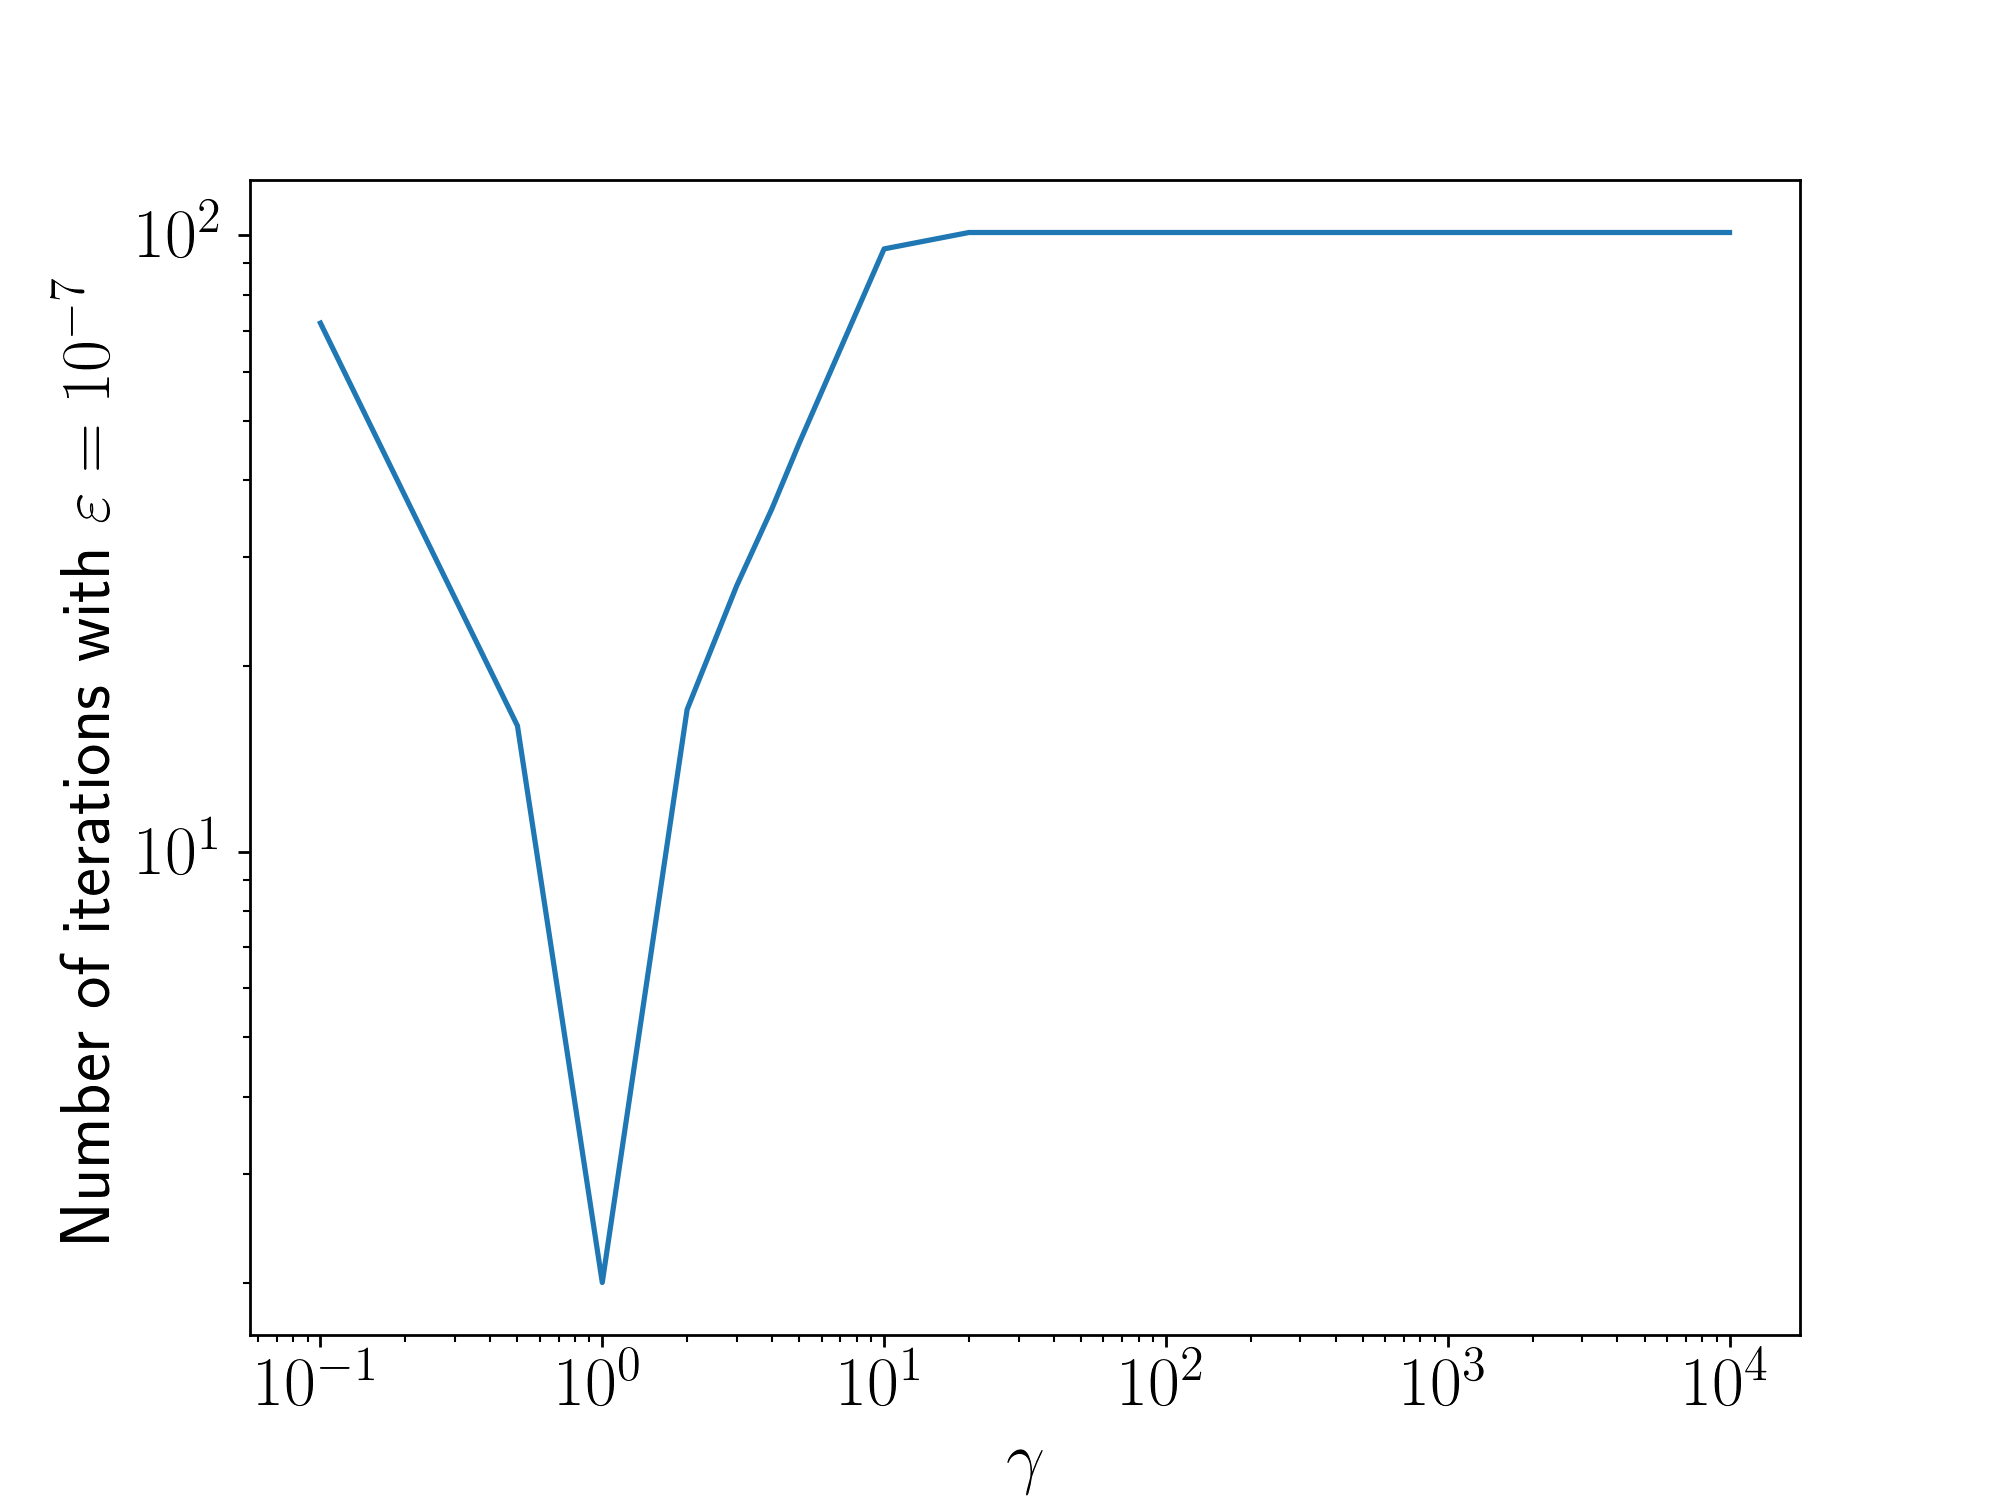

Text(0,0.5,'Number of iterations with $\\varepsilon = 10^{-7}$')

In [5]:
plt.rc("text", usetex=True)

gammas = [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 50, 100, 1000, 5000, 10000]
# gammas = [1]
num_iter_converg = []
for g in gammas:
    A = np.array([[1, 0], 
                  [0, g]], dtype=np.float64)
    f = lambda x: my_f(x, A)
    gradf = lambda x: my_gradf(x, A)
#     x0 = np.random.rand(A.shape[0])
#     x0 = np.sort(x0)
#     x0 = x0[::-1]
    x0 = np.array([g, 1], dtype=np.float64)
#     print x0[1] / x0[0]
    gd = methods.GradientDescent(f, gradf, ss.ExactLineSearch4Quad(A))
    x = gd.solve(x0, tol=1e-7, max_iter=100)
    num_iter_converg.append(len(gd.get_convergence()))

plt.figure(figsize=(8, 6))
plt.loglog(gammas, num_iter_converg)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel(r"$\gamma$", fontsize=20)
plt.ylabel(r"Number of iterations with $\varepsilon = 10^{-7}$", fontsize=20)

- При неудачном начальном приближении сходимость для плохо обусловенной задачи очень медленная
- При случайном начальном приближении сходимость может быть гораздо быстрее теоретических оценок
- **Open problem:** получить оценки сходимости, использующие случайное начальное приближение, а не худшее из возможных

## Эксперимент на многомерной задаче
Пусть $A \in \mathbb{R}^{m \times n}$. Рассмотрим систему линейных неравенств: $Ax \leq 1$ при условии $|x_i| \leq 1$ для всех $i$.

**Определение.** Аналитическим центром системы неравенств $Ax \leq 1$ при условии $|x_i| \leq 1$ является решение задачи
$$
f(x) = - \sum_{i=1}^m \log(1 - a_i^{\top}x) - \sum_{i = 1}^n \log (1 - x^2_i) \to \min_x
$$
$$
f'(x) - ?
$$

In [6]:
n = 100
m = 200
x0 = np.zeros(n)
A = np.random.rand(n, m)

### Точное решение с помощью CVXPy

In [9]:
import cvxpy as cvx
print(cvx.installed_solvers())
x = cvx.Variable(n, 1)

obj = cvx.Minimize(cvx.sum_entries(-cvx.log(1 - A.T * x)) - 
                   cvx.sum_entries(cvx.log(1 - cvx.square(x))))
prob = cvx.Problem(obj)
prob.solve(solver="SCS", verbose=True)
x = x.value
print("Optimal value =", prob.value)

['ECOS', 'ECOS_BB', 'SCS', 'LS']
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 20700, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 500, constraints m = 1200
Cones:	soc vars: 300, soc blks: 100
	exp vars: 900, dual exp vars: 0
Setup time: 2.15e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.31e+02  2.66e+03  7.93e-01 -3.30e+04 -3.81e+03  0.00e+00  5.31e-03 
    80| 4.85e-05  6.35e-04  3.49e-05 -6.48e+02 -6.48e+02  1.43e-13  2.03e-01 
-----------------------------------------------------------

### Решение с помощью градиентного спуска

In [10]:
f = lambda x: -np.sum(np.log(1 - A.T.dot(x))) - np.sum(np.log(1 - x*x))
grad_f = lambda x: np.sum(A.dot(np.diagflat(1 / (1 - A.T.dot(x)))), \
                          axis=1) + 2 * x / (1 - np.power(x, 2))

Convergence in 15 iterations
Norm of gradient = 6.3034968598401165e-06
Function value = -648.2769673761304


/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


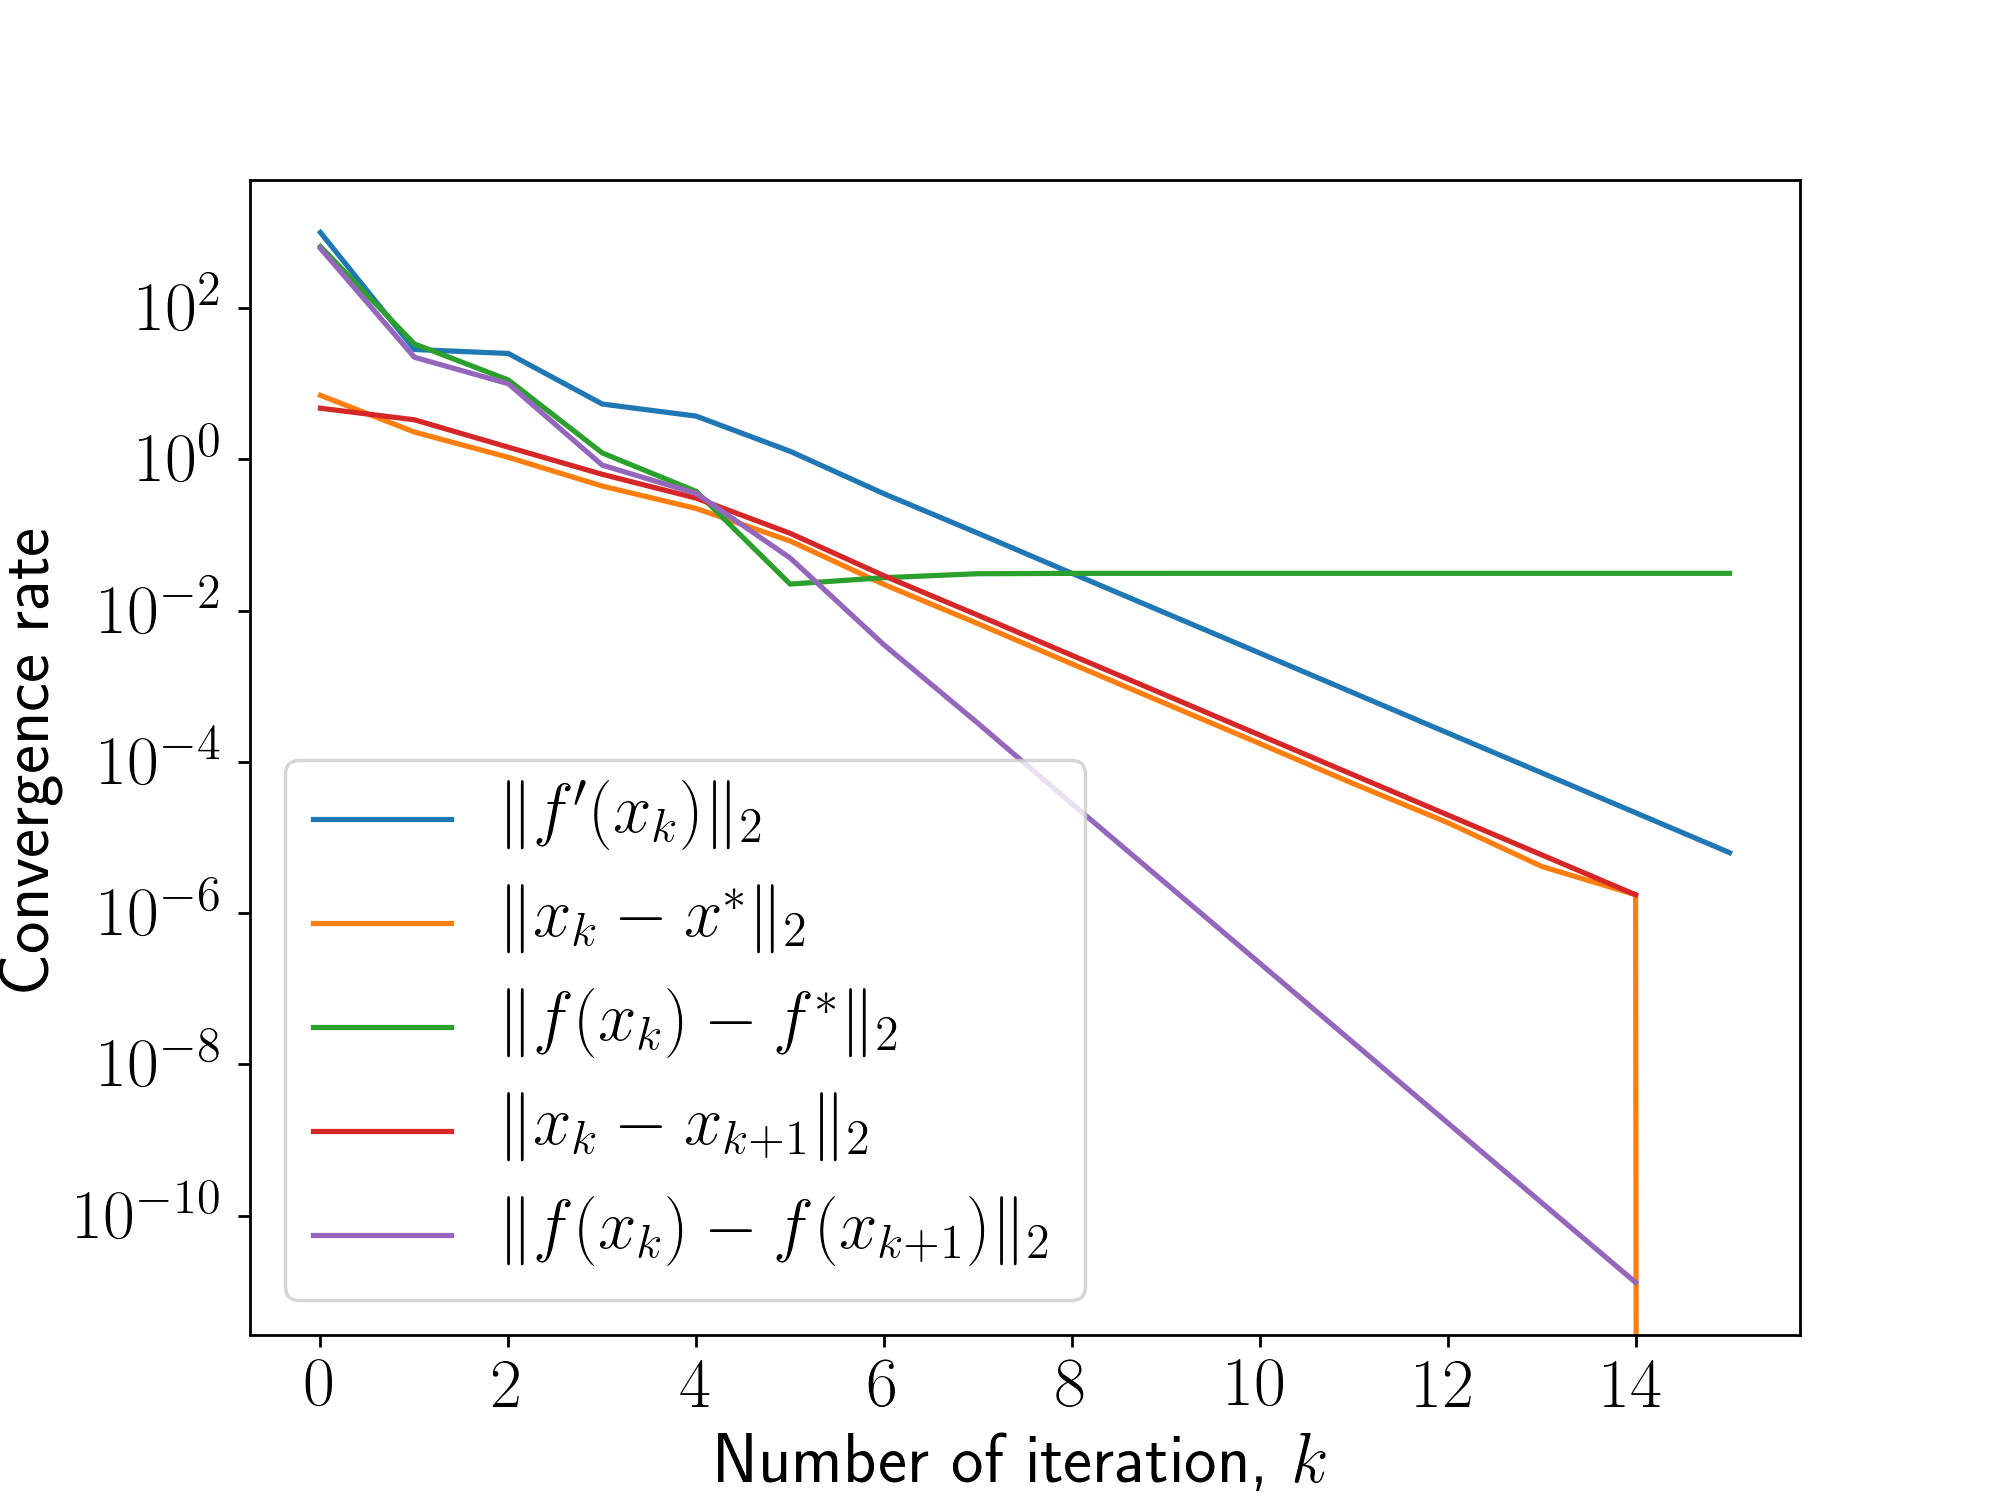

In [11]:
gd = methods.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho=0.7, beta=0.1, init_alpha=1.))
x = gd.solve(x0, tol=1e-5, max_iter=100, disp=True)

x_conv = gd.get_convergence()
grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]
plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.semilogy([np.linalg.norm(x - np.array(x_k)) for x_k in x_conv], label=r"$\|x_k - x^*\|_2$")
plt.semilogy([np.linalg.norm(prob.value - f(np.array(x_k))) for x_k in x_conv], label=r"$\|f(x_k) - f^*\|_2$")
plt.semilogy([np.linalg.norm(np.array(x_conv[i]) - np.array(x_conv[i+1])) for i in range(len(x_conv) - 1)], label=r"$\|x_k - x_{k+1}\|_2$")
plt.semilogy([np.linalg.norm(f(np.array(x_conv[i])) - f(np.array(x_conv[i+1]))) for i in range(len(x_conv) - 1)], label=r"$\|f(x_k) - f(x_{k+1})\|_2$")
plt.xlabel(r"Number of iteration, $k$", fontsize=20)
plt.ylabel(r"Convergence rate", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

### Зависимость скорости сходимости от параметров линейного поиска

Для простоты используем только условие достаточного убывания

#### Зависимость от $\rho$

От величины коэффициента $\rho$ зависит насколько агрессивно будет уменьшаться величина шага в процессе поиска.

/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


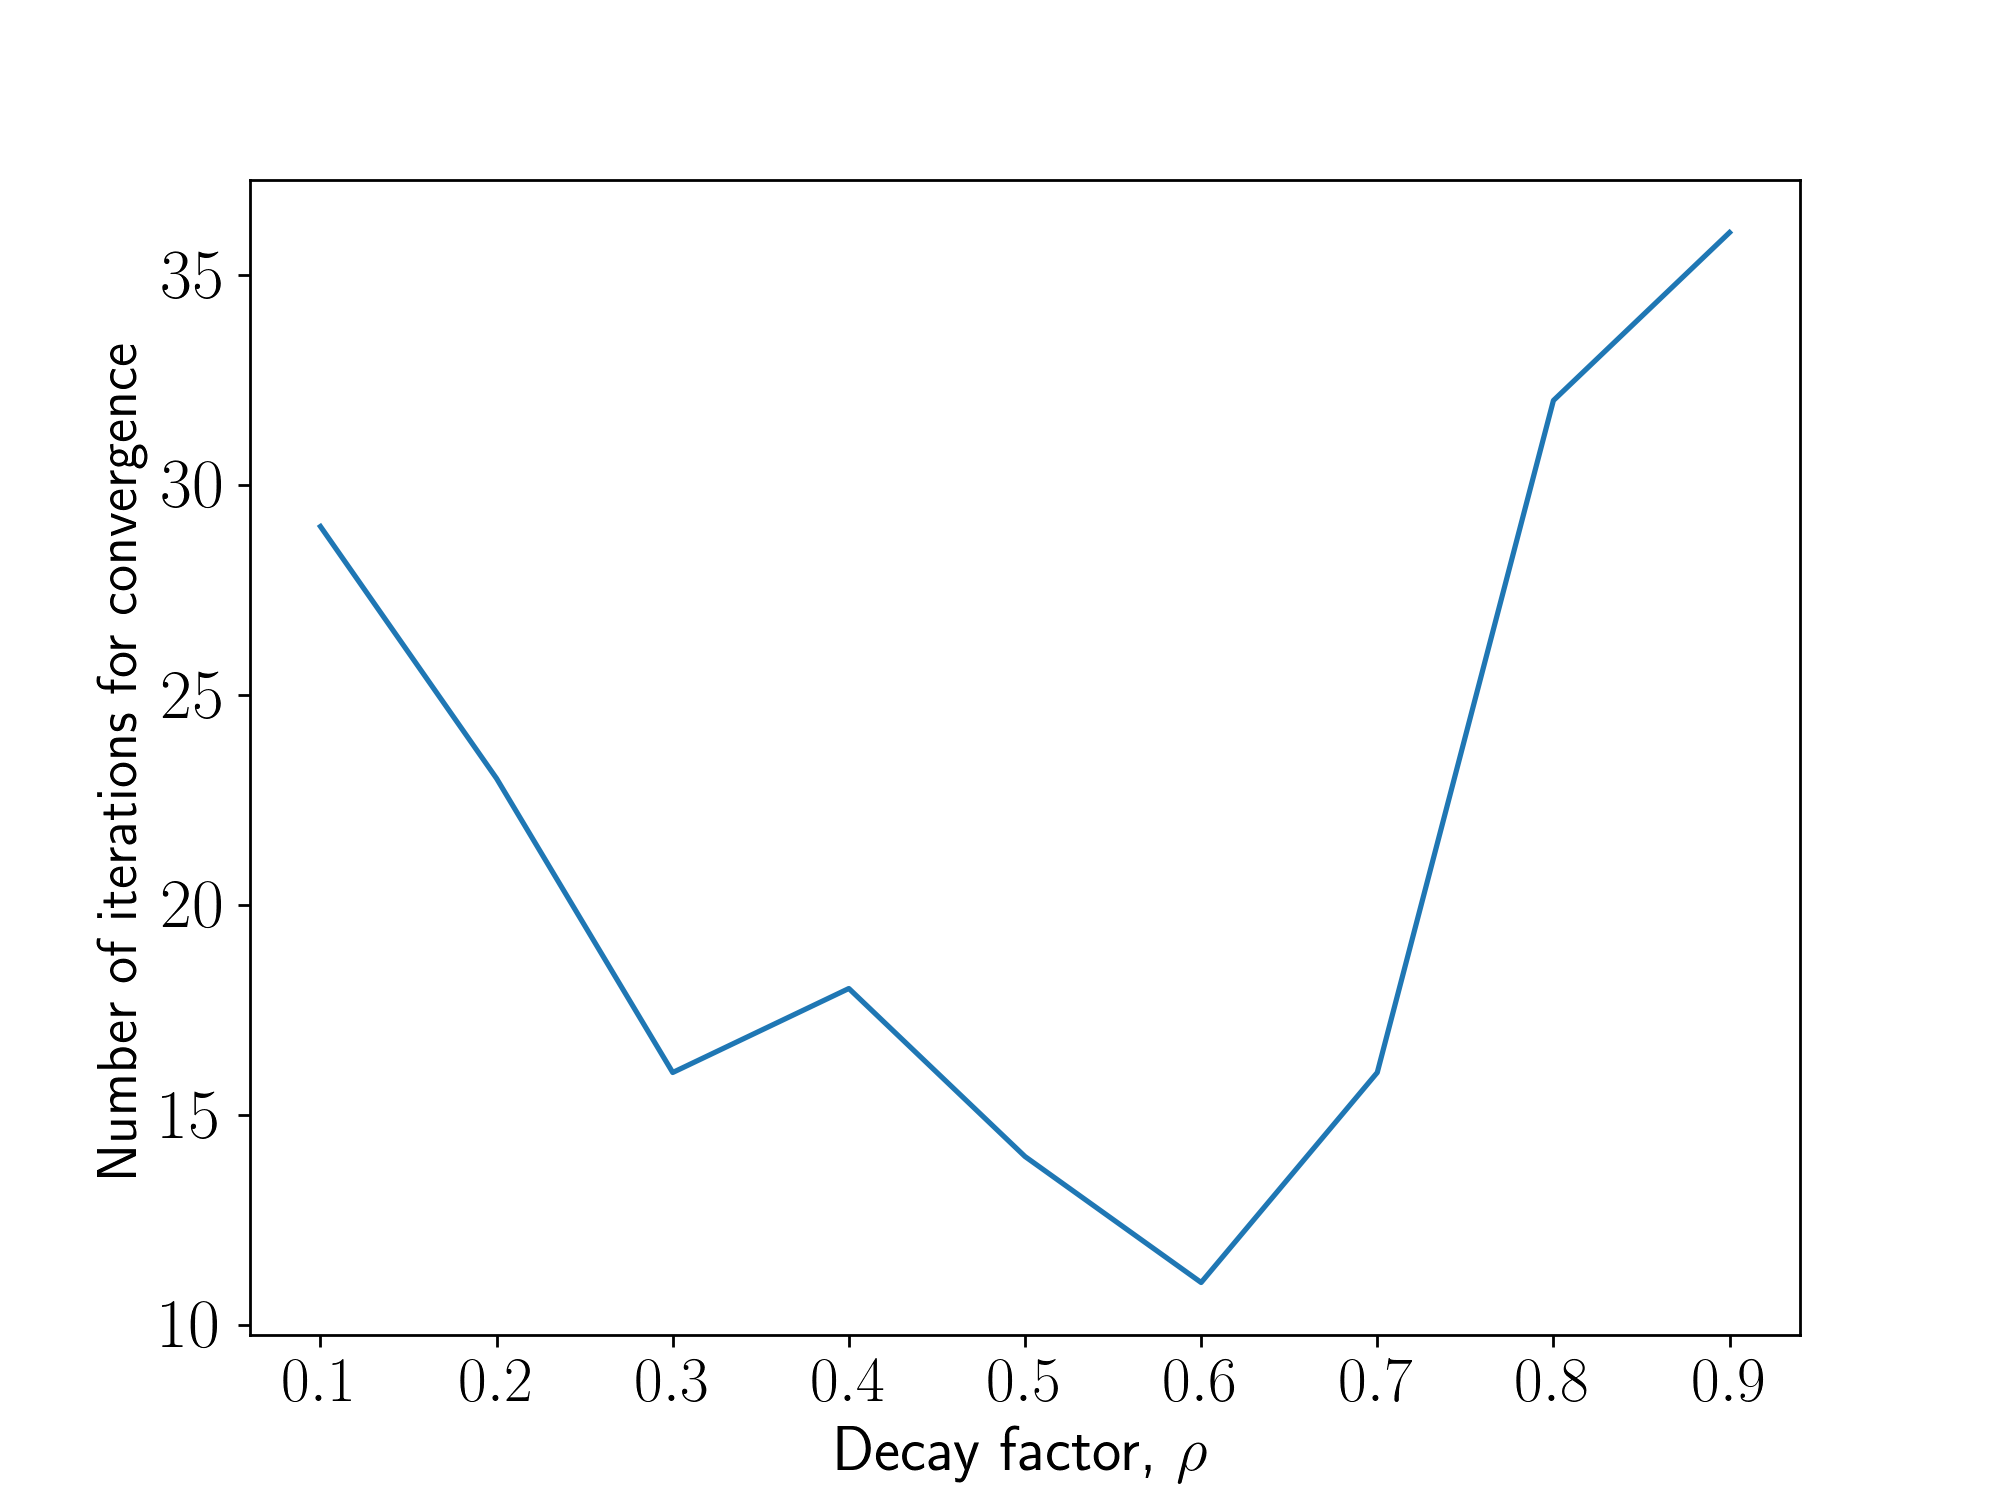

In [11]:
rhos = [0.1 + i * 0.1 for i in range(9)]
conv_iter = []
hist_x = []
callback = lambda x: my_callback(x, hist_x)
for rho in rhos:
    gd = methods.GradientDescent(f, grad_f, ss.Backtracking(rule_type="Armijo", beta=0.1, rho=rho, init_alpha=1.)) 
    x = gd.solve(x0, tol=1e-4, max_iter=100)
    conv_iter.append(len(gd.get_convergence()))
    
#     plt.semilogy(range(1, len(grad_norm) + 1), grad_norm, label=r"$\rho$ = " + str(rho))
    hist_x = []
plt.figure(figsize=(8, 6))
plt.plot(rhos, conv_iter)
plt.xlabel(r"Decay factor, $\rho$", fontsize=18)
plt.ylabel(r"Number of iterations for convergence", fontsize=16)
plt.xticks(fontsize = 18)
_ = plt.yticks(fontsize = 20)

#### Зависимость от $\beta_1$

От коэффициента $\beta_1$ зависит угол наклона линейной аппроксимации, с которой сравнивается значение в новой точке $x_k - \alpha_k f'(x_k)$. 

<IPython.core.display.Javascript object>


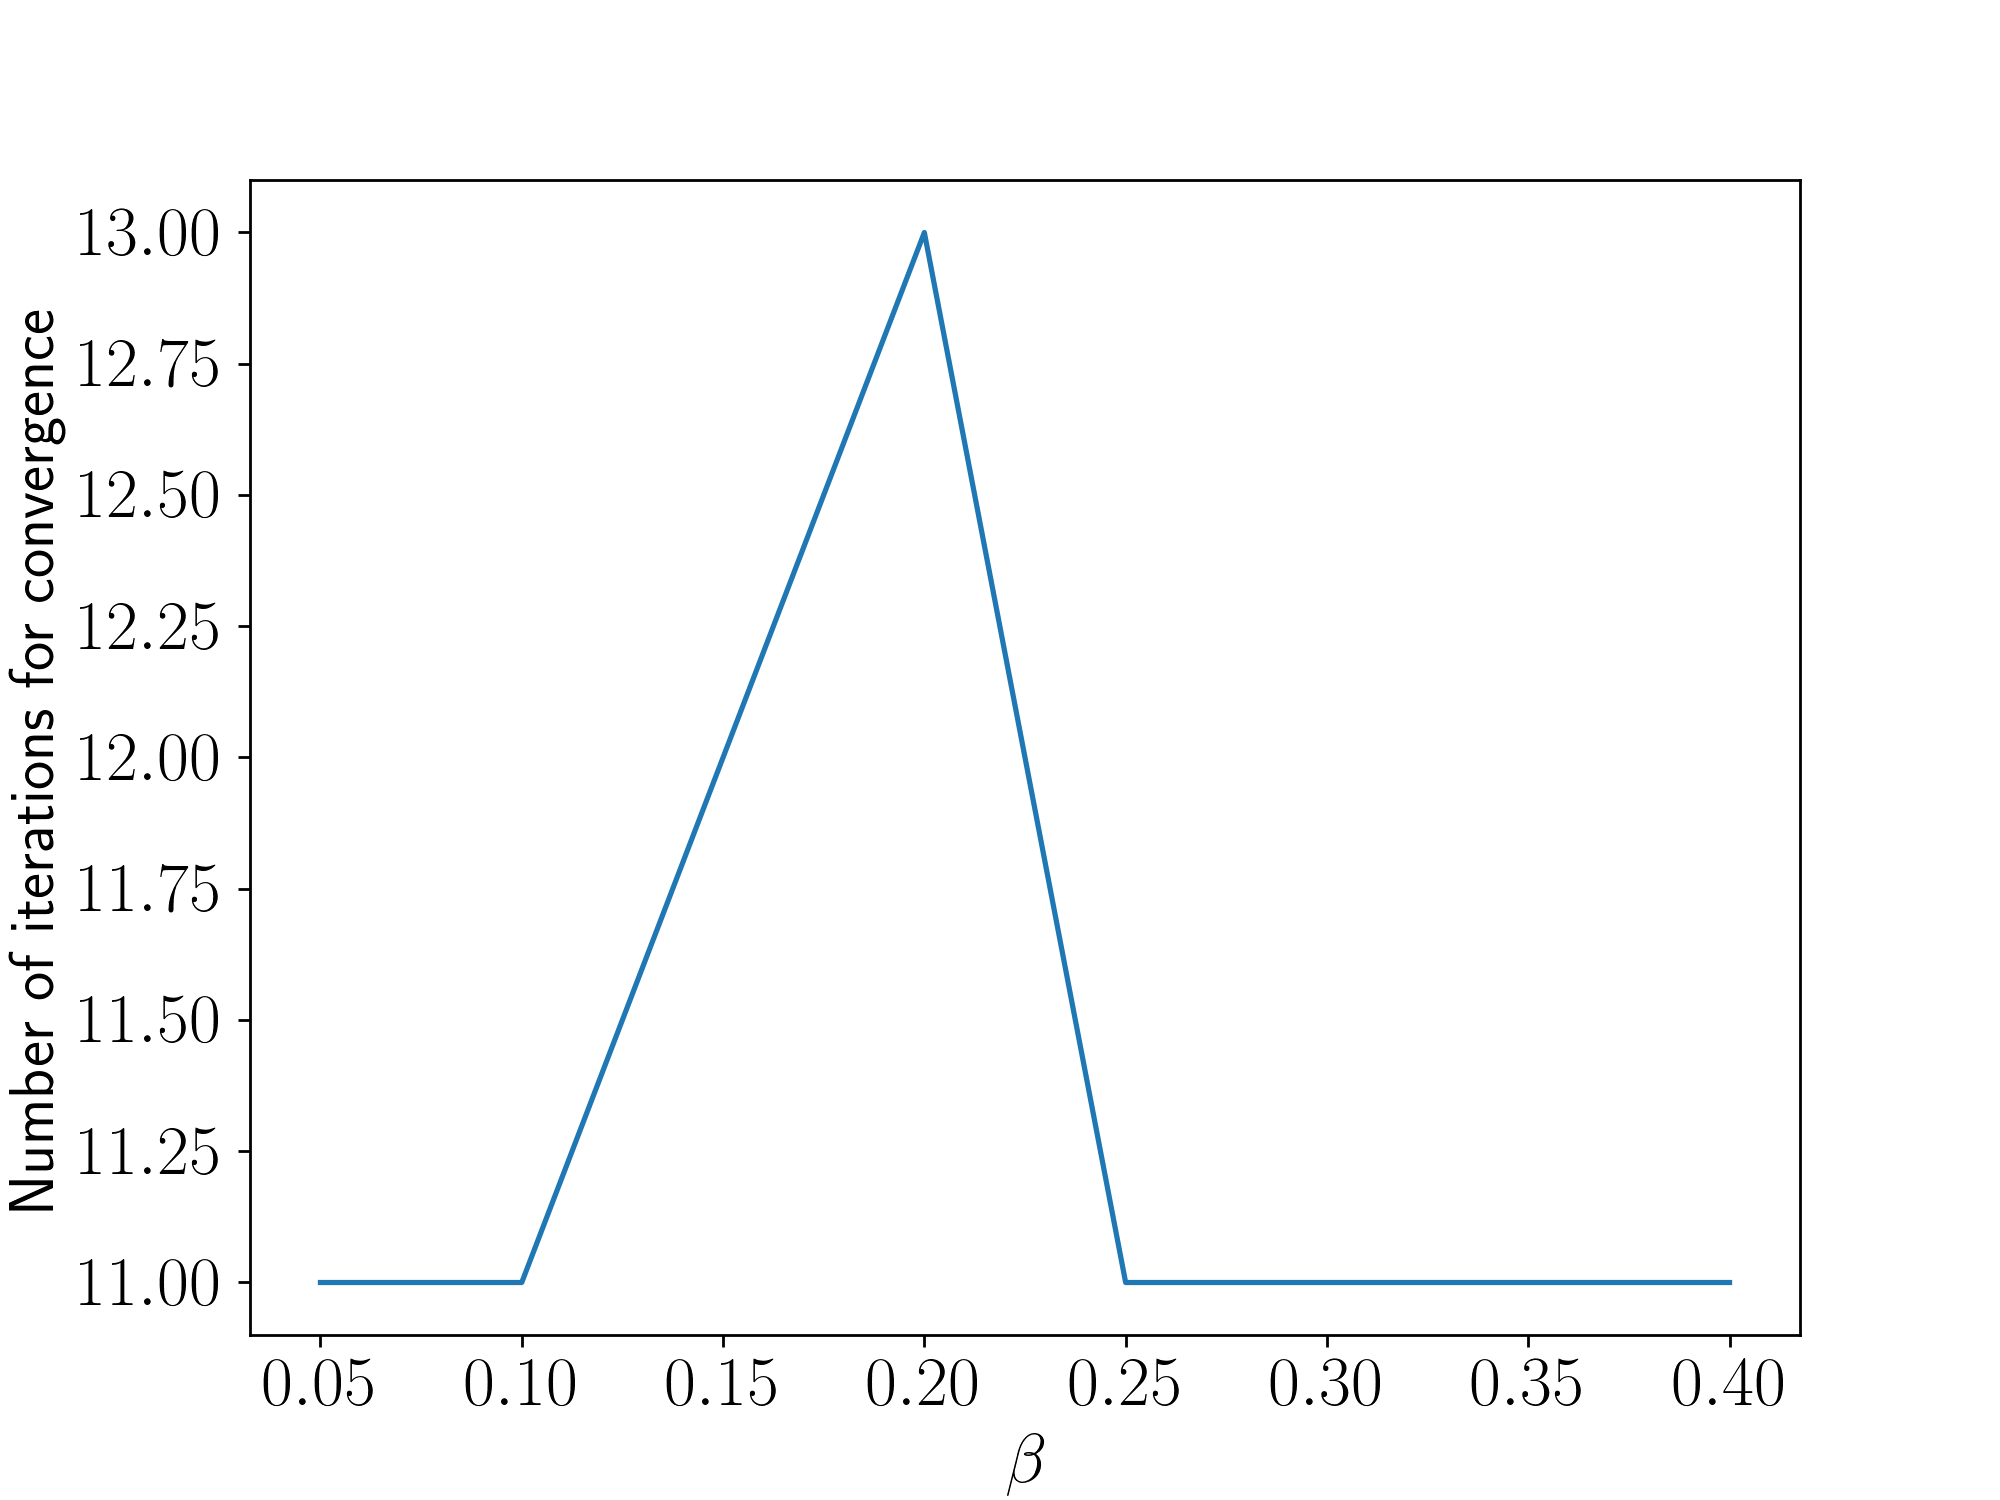

/Users/alex/anaconda3/envs/cvxpy/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [12]:
betas = [0.05 + i * 0.05 for i in range(8)]
hist_x = []
num_iter_conv = []
plt.figure(figsize=(8, 6))
for beta in betas:
    gd = methods.GradientDescent(f, grad_f, ss.Backtracking(rule_type="Armijo", beta=beta, rho=0.6, init_alpha=1.)) 
    x = gd.solve(x0, tol=1e-4, max_iter=100)
    num_iter_conv.append(len(gd.get_convergence()))
    hist_x = []
plt.plot(betas, num_iter_conv)
plt.xlabel(r"$\beta$", fontsize=20)
plt.ylabel(r"Number of iterations for convergence", fontsize=18)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)

## Pro & Contra

Pro
- легко реализовать
- сходимость как минимум к стационарной точке
- параметры при выборе шага влияют на сходимость не столь сильно
- имеет многочисленные вариации

Contra
- линейная сходимость
- очень сильно зависит от числа обусловленности $f''(x)$, выбор начального приближения может помочь
- не является оптимальным для выпуклых функций с липшицевым градиентом и сильновыпуклых функций (см. [ускорение Нестерова](https://blogs.princeton.edu/imabandit/2013/04/01/acceleratedgradientdescent/))

Возможно, расширениям и вариациям градиентного спуска будет посвящён отдельный семинар (но это неточно).

## Резюме
1. Методы спуска
2. Направление убывания
3. Метод градиентного спуска
4. Правила выбора шага
5. Теоремы сходимости
6. Эксперименты